# Importing Libraries and Loading Dataset

In [141]:
#Importing Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from numpy.random import seed
seed(0)

In [142]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


In [143]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [144]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [145]:
tax_data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

# Data Pre-processing and EDA

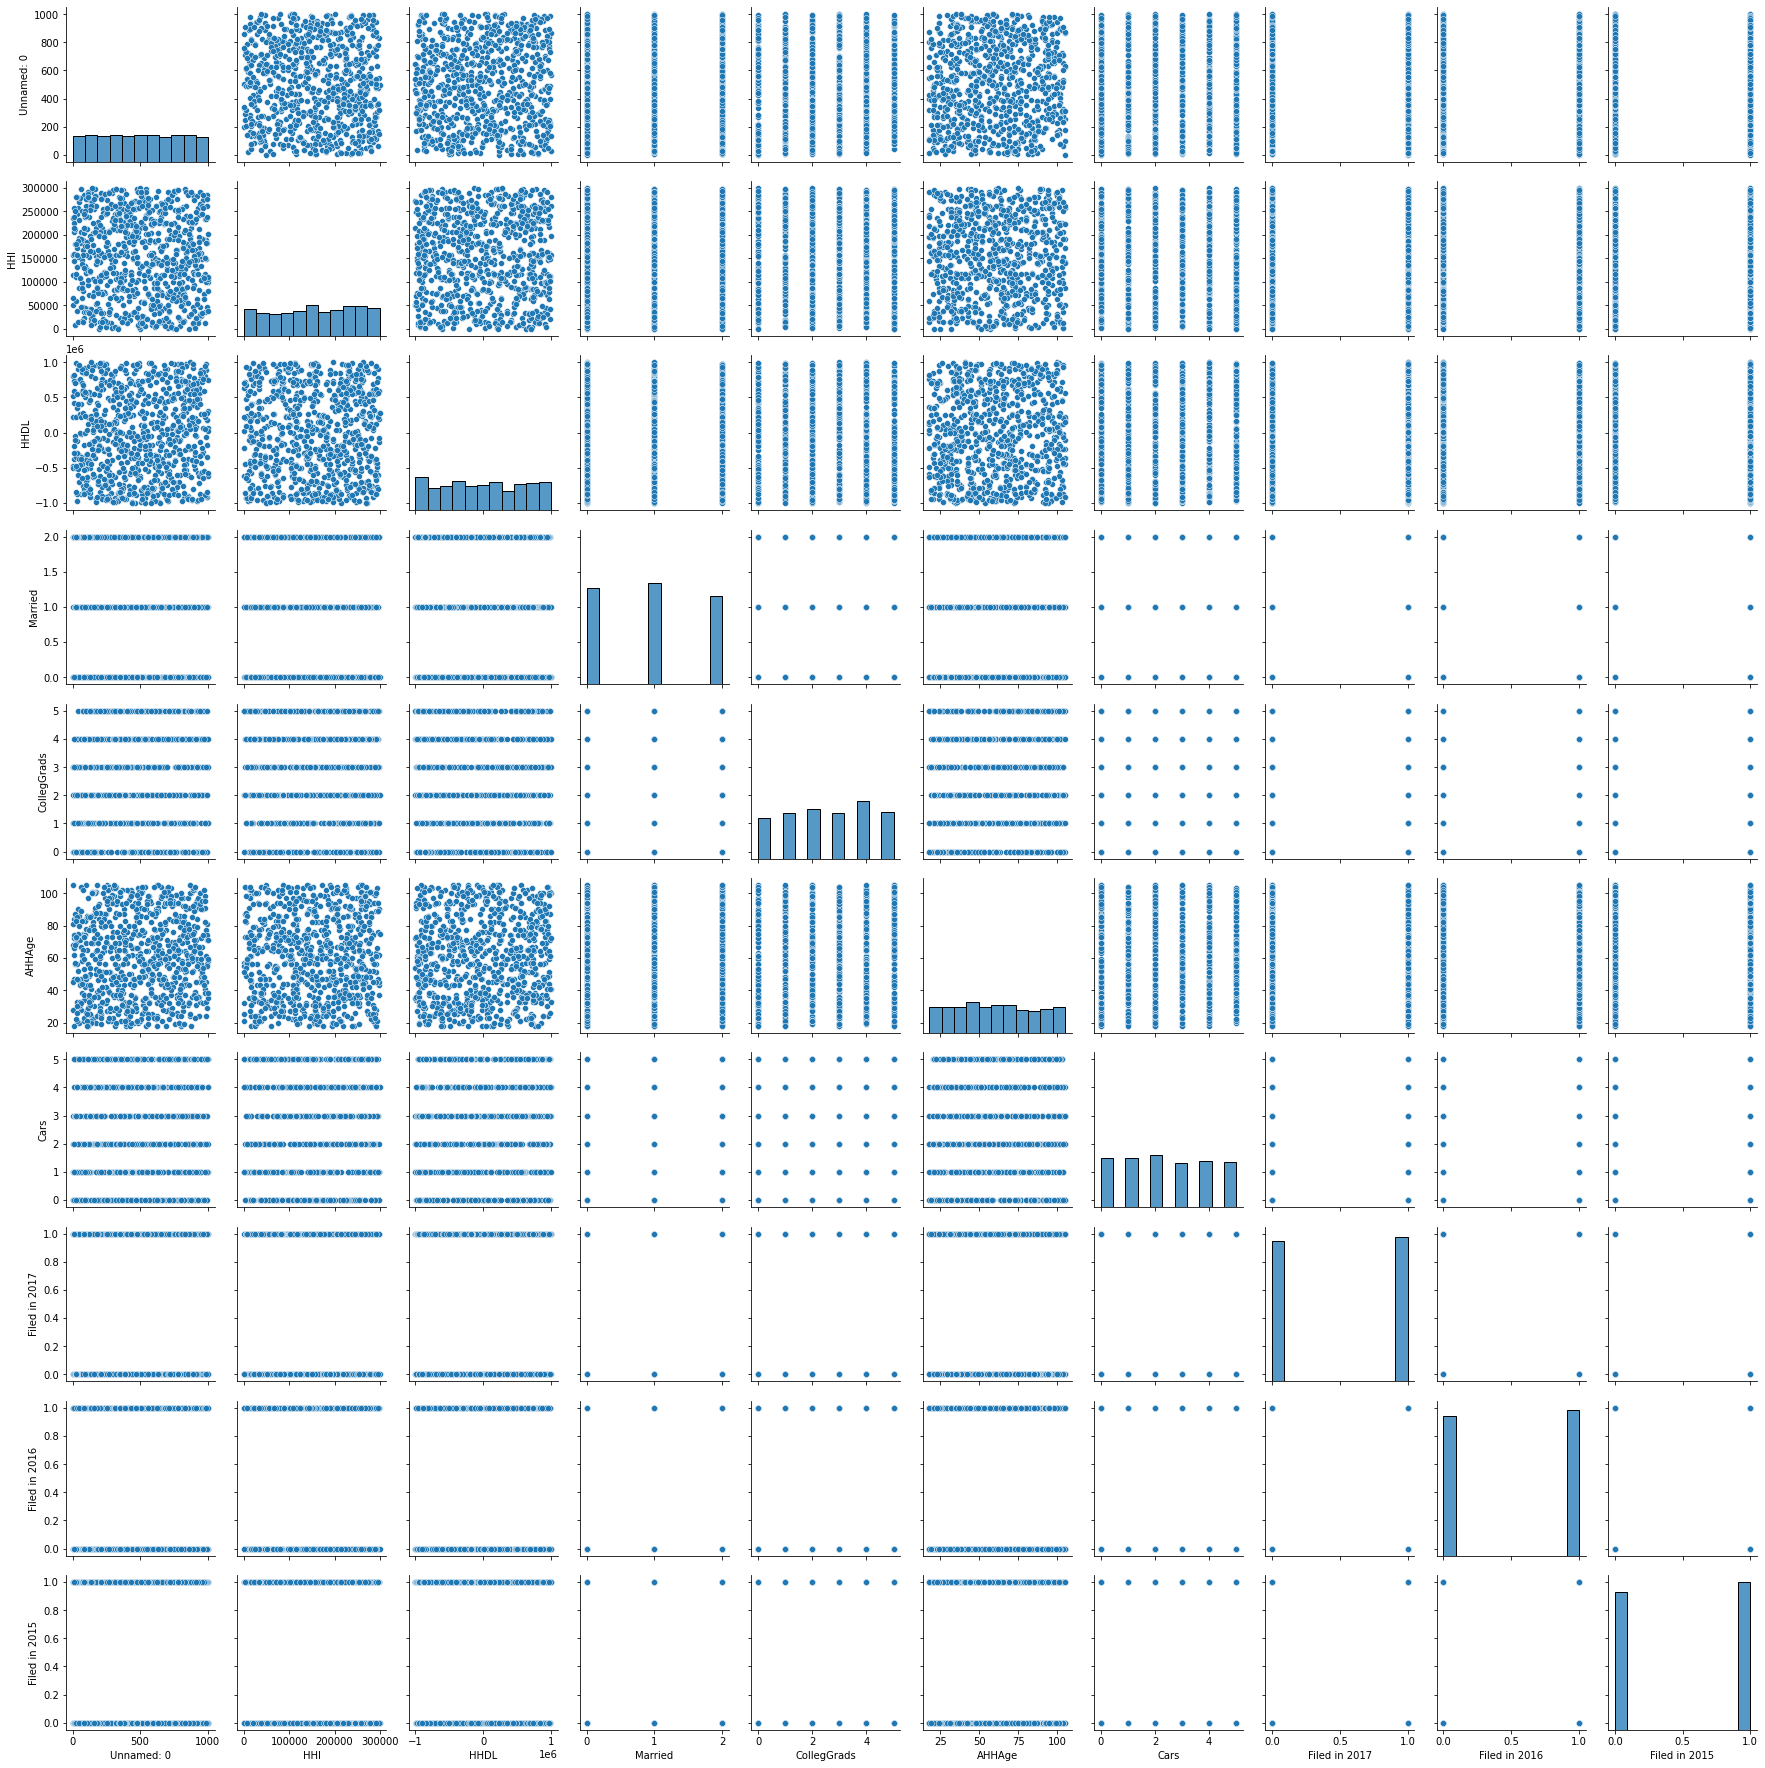

In [146]:
#From this we can observe that data is distrbuted very well and no out liners are present for us to work on outliner analysis
sns.pairplot(tax_data)

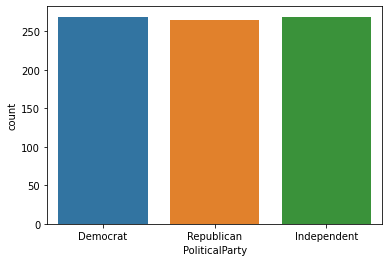

In [147]:
#Let us check whether our data is balanced or imbalanced
sns.countplot( x = "PoliticalParty" , data = tax_data)

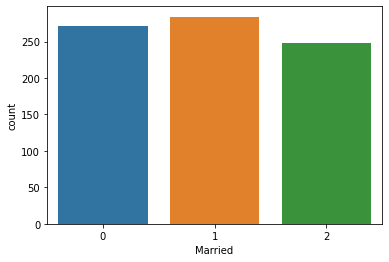

In [148]:
#Checking out how every independednt variable is distributed
sns.countplot( x = "Married" , data = tax_data)

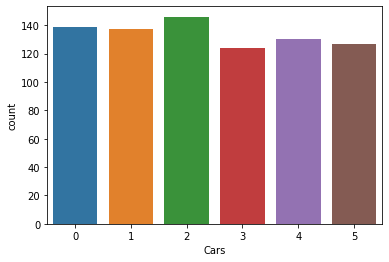

In [149]:
#Checking out how every independednt variable is distributed
sns.countplot( x = "Cars"  , data = tax_data)

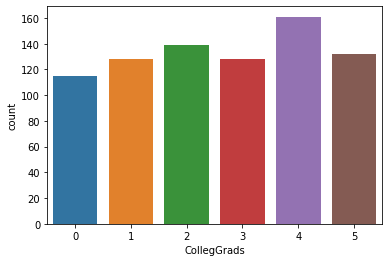

In [150]:
#Checking out how every independednt variable is distributed
sns.countplot( x = "CollegGrads"  , data = tax_data)

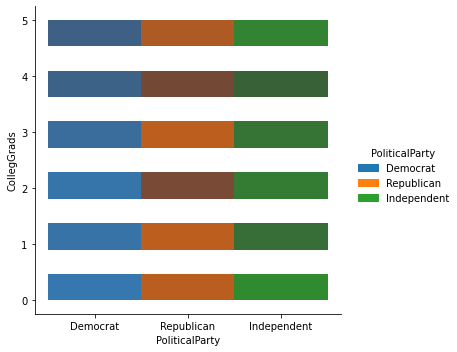

In [151]:
sns.displot(x = "PoliticalParty" , y = "CollegGrads" , hue = "PoliticalParty"  , data = tax_data)

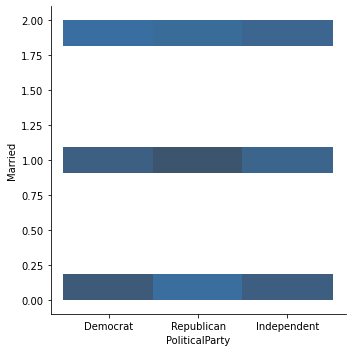

In [152]:
sns.displot(x = "PoliticalParty" , y = "Married" , data = tax_data)

In [153]:
#Checking correlation of each data with each other
tax_data.corr()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
Unnamed: 0,1.000000,-0.044713,0.042304,0.000487,0.045215,0.047690,0.041287,0.055262,0.012946,-0.017110
HHI,-0.044713,1.000000,-0.013745,-0.007374,-0.029947,0.029051,0.025449,0.061525,0.040308,0.027026
HHDL,0.042304,-0.013745,1.000000,-0.039531,0.015394,0.051930,0.016308,0.035499,0.022683,0.029971
Married,0.000487,-0.007374,-0.039531,1.000000,-0.012980,0.029995,-0.020007,-0.056867,0.054926,-0.028267
CollegGrads,0.045215,-0.029947,0.015394,-0.012980,1.000000,0.036692,-0.000744,-0.046625,0.034875,0.032438
AHHAge,0.047690,0.029051,0.051930,0.029995,0.036692,1.000000,0.069374,0.014954,-0.006631,0.016506
Cars,0.041287,0.025449,0.016308,-0.020007,-0.000744,0.069374,1.000000,-0.009360,0.063988,0.036764
Filed in 2017,0.055262,0.061525,0.035499,-0.056867,-0.046625,0.014954,-0.009360,1.000000,-0.086207,0.008262
Filed in 2016,0.012946,0.040308,0.022683,0.054926,0.034875,-0.006631,0.063988,-0.086207,1.000000,-0.051725
Filed in 2015,-0.017110,0.027026,0.029971,-0.028267,0.032438,0.016506,0.036764,0.008262,-0.051725,1.000000


In [154]:
abs(tax_data.corr())>0.75

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
Unnamed: 0,True,False,False,False,False,False,False,False,False,False
HHI,False,True,False,False,False,False,False,False,False,False
HHDL,False,False,True,False,False,False,False,False,False,False
Married,False,False,False,True,False,False,False,False,False,False
CollegGrads,False,False,False,False,True,False,False,False,False,False
AHHAge,False,False,False,False,False,True,False,False,False,False
Cars,False,False,False,False,False,False,True,False,False,False
Filed in 2017,False,False,False,False,False,False,False,True,False,False
Filed in 2016,False,False,False,False,False,False,False,False,True,False
Filed in 2015,False,False,False,False,False,False,False,False,False,True


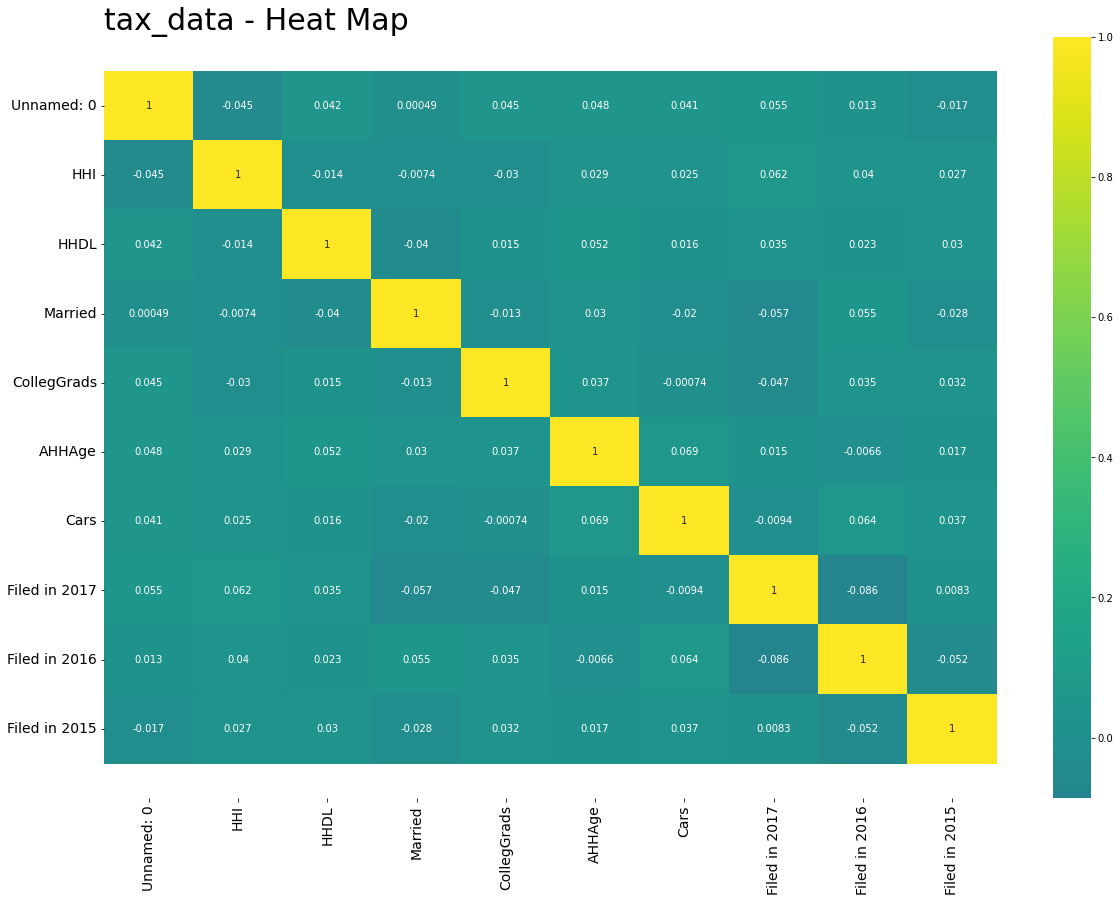

In [155]:
#No PARAMETER is correlated much to any other parameter
plt.figure(figsize=(20,14))
ax = sns.heatmap(tax_data.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "tax_data - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [156]:
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


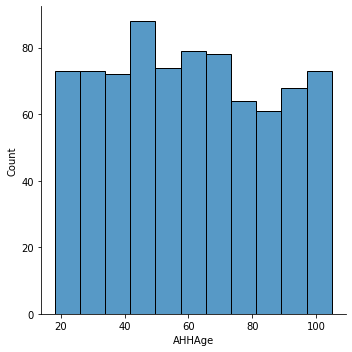

In [157]:
#Checking out how each paramter is distributed while taking out some observations
sns.displot(x = "AHHAge" , data = tax_data)

In [158]:
tax_data_go = pd.DataFrame(tax_data['Filed in 2015'].value_counts()).reset_index()
tax_data_go.loc[tax_data_go["index"] == "1", "index"] = "Yes"
tax_data_go.loc[tax_data_go["index"] == "0", "index"] = "No"
display(tax_data_go.head())

,index,Filed in 2015
0,1,415
1,0,388


In [159]:
tax_data_plot = go.Bar(
                    y=tax_data_go['index'],
                    x=tax_data_go['Filed in 2015'],
                   orientation='h',
                   marker_color=px.colors.qualitative.Dark24[0:2],
                   #color_discrete_sequence=["red"]
                    )
layout = go.Layout(   autosize=False,
                      width=300,
                      height=300,
                   #colorscale = px.colors.sequential.Viridis,
                      #color='tax_data_go',
                      title='How many taxpayers Filed case in 2015',
                      yaxis = dict(title='1= Yes & 2 = No'),
                      xaxis = dict(title='Number of TaxPayers'),
                      margin=go.layout.Margin(
                                                    l=50,
                                                    r=50,
                                                    b=100,
                                                    t=100,
                                                    pad = 4
                                                )
                       )
fig = go.Figure(data=[tax_data_plot], layout=layout)

pyo.iplot(fig)

In [160]:
tax_data_go = pd.DataFrame(tax_data['Filed in 2016'].value_counts()).reset_index()
tax_data_go.loc[tax_data_go["index"] == "1", "index"] = "Yes"
tax_data_go.loc[tax_data_go["index"] == "0", "index"] = "No"
display(tax_data_go.head())

,index,Filed in 2016
0,1,409
1,0,394


In [161]:
tax_data_plot = go.Bar(
                    y=tax_data_go['index'],
                    x=tax_data_go['Filed in 2016'],
                   orientation='h',
                   marker_color=px.colors.qualitative.Dark24[0:2],
                   #color_discrete_sequence=["red"]
                    )
layout = go.Layout(   autosize=False,
                      width=300,
                      height=300,
                   #colorscale = px.colors.sequential.Viridis,
                      #color='tax_data_go',
                      title='How many taxpayers Filed case in 2016',
                      yaxis = dict(title='1= Yes & 2 = No'),
                      xaxis = dict(title='Number of TaxPayers'),
                      margin=go.layout.Margin(
                                                    l=50,
                                                    r=50,
                                                    b=100,
                                                    t=100,
                                                    pad = 4
                                                )
                       )
fig = go.Figure(data=[tax_data_plot], layout=layout)

pyo.iplot(fig)

In [162]:
tax_data_go = pd.DataFrame(tax_data['Filed in 2017'].value_counts()).reset_index()
tax_data_go.loc[tax_data_go["index"] == "1", "index"] = "Yes"
tax_data_go.loc[tax_data_go["index"] == "0", "index"] = "No"
display(tax_data_go.head())

,index,Filed in 2017
0,1,407
1,0,396


In [163]:
tax_data_plot = go.Bar(
                    y=tax_data_go['index'],
                    x=tax_data_go['Filed in 2017'],
                   orientation='h',
                   marker_color=px.colors.qualitative.Dark24[0:2],
                   #color_discrete_sequence=["red"]
                    )
layout = go.Layout(   autosize=False,
                      width=300,
                      height=300,
                   #colorscale = px.colors.sequential.Viridis,
                      #color='tax_data_go',
                      title='How many taxpayers Filed case in 2017',
                      yaxis = dict(title='1= Yes & 2 = No'),
                      xaxis = dict(title='Number of TaxPayers'),
                      margin=go.layout.Margin(
                                                    l=50,
                                                    r=50,
                                                    b=100,
                                                    t=100,
                                                    pad = 4
                                                )
                       )
fig = go.Figure(data=[tax_data_plot], layout=layout)

pyo.iplot(fig)

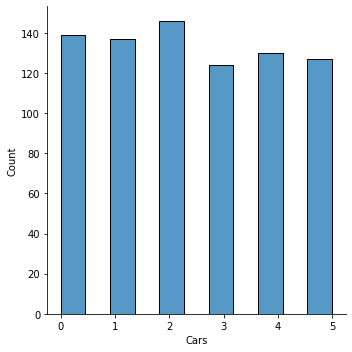

In [167]:
sns.displot(x = "Cars" , data = tax_data)

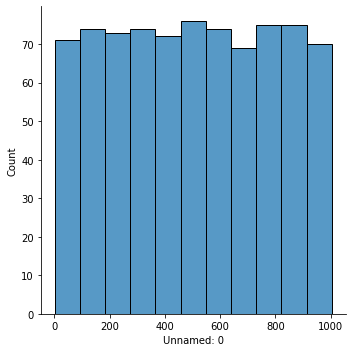

In [168]:
sns.displot(x = "Unnamed: 0" , data = tax_data)

# Data Modelling

In [169]:
#Converting y categorical to numerical data
label_encoder = LabelEncoder() 
tax_data['PoliticalParty']= label_encoder.fit_transform(tax_data['PoliticalParty']) 
tax_data['PoliticalParty'].unique() 

array([0, 2, 1])

In [170]:
#Splitting dataset into dependent and independent variable
X=tax_data.drop(['Unnamed: 0' ,'PoliticalParty'],axis=1)
test_data = test_data.drop(['Unnamed: 0'], axis=1)
y=tax_data['PoliticalParty']

In [171]:
X.shape

(803, 9)

In [172]:
y.shape

(803,)

In [173]:
#Scaling our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_data=pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns)

In [182]:
#Splitting our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=24)

In [183]:
X_train.shape

(642, 9)

In [184]:
X_test.shape

(161, 9)

In [185]:
#Trying different classifiers for best results
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.36645962732919257


In [186]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
accuracy_score(y_test,predictions)

0.32919254658385094

In [188]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=14)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.391304347826087


In [187]:
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accuracy_score(y_test,pred)

0.4409937888198758

In [181]:
pred=rf.predict(test_data)
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("rf.csv",index=False)